<div style="float:right;padding-top:20px">
   <img src="https://github.com/boudjelaba/Utiles/blob/main/Logo/Carnus_1.png?raw=true" style="width:80px"/>   
</div>

Carnus - K. Boudjelaba

# Signaux numériques


---

### Table des matières :

* <a href="#NUS">Numériser un signal : </a>
    * <a href="#ECH">Echantillonnage : </a>
        * <a href="#RDS">Repliement de spectre (aliasing) : </a>
        * <a href="#IFE">Influence de la fréquence d'échantillonnage sur les signaux audio : </a>
    * <a href="#QUA">Quantification : </a>
        * <a href="#CEQ">Caractérisation de l'erreur de quantification : </a>
        * <a href="#IQS">Influence de la quantification sur les signaux audio : </a>


---

<a id="NUS"></a>

## Numériser un signal :
La plupart des signaux dans la vie courante sont continus : tension fournie par un capteur, par un GBF ... Cependant, pour que les ordinateurs puissent traiter ces signaux continus, ils doivent être convertis en représentations numériques via un convertisseur analogique-numérique (CAN). Un signal numérique est différent du signal continu (deux différences principales) :

- Il est échantillonné à des pas de temps spécifiques. Par exemple, le son est souvent échantillonné à 44,1 kHz (ou une fois toutes les 0,023 ms).
- Il est quantifié à des niveaux de tension spécifiques. Par exemple, sur l'Arduino Uno, le microcontrôleur a un CAN 10 bits, donc une tension continue d'entrée peut être discrétisée par un pas $\dfrac{5𝑉}{2^{10}} = 4.88 𝑚𝑉$.

---
<a id="ECH"></a>

### Echantillonnage
Pour enregistrer un signal dans un format numérique (échantillonner le signal), on mesure ses valeurs à des instants $t_i$ bien précis $i\in[0,N-1]$. Dans ce cas, on enregistre $N$ valeurs du signal; par conséquent, on perd une quantité d'information.   
La fréquence d'échantillonnage est définie par : $f_e=\frac{N-1}{D}$ avec $D$ : la durée d'observation du signal.

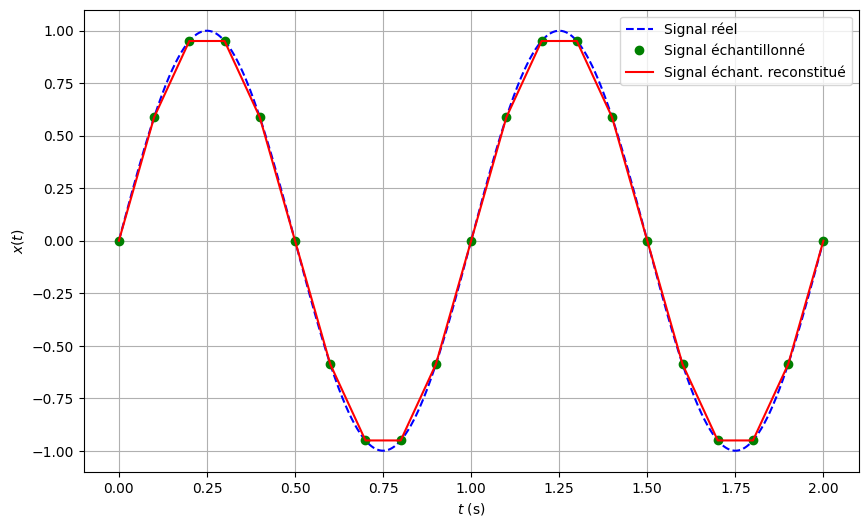

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Signal sinusoïdal
T = 1.
def signal(t): 
    return np.sin(2. * np.pi * t / T)

# Echantillonnage du signal sinusoïdal
D = 2. # Duree d'observation
fe = 10. # Frequence d'échantillonnage
N = int(D * fe) + 1 # Nombre de points enregistrés
te = np.linspace(0., (N-1)/fe, N) # Grille d'échantillonnage
tp = np.linspace(0., D, 1000) # Grille plus fine pour tracer l'allure du signal parfait

plt.figure(figsize=(10,6))
plt.plot(tp, signal(tp), 'b--', label = u"Signal réel")
plt.plot(te, signal(te),'go', label = u"Signal échantillonné")
plt.plot(te, signal(te), 'r-', label = u"Signal échant. reconstitué")
plt.xlabel("$t$ (s)")
plt.ylabel("$x(t)$")
plt.grid()
plt.legend()
plt.show()

---
<a id="RDS"></a>

### Repliement de spectre (aliasing) :

On va échantillonner quatre signaux à une fréquence d'échantillonnage de 50 Hz :     
signal1 = 5Hz, signal2 = 10Hz, signal3 = 20Hz et signal4 = 60Hz. 
Le signal "signal4" ne respecte pas la condition de Nyquist, qui est $\frac{1}{2} ∗ 50𝐻𝑧 = 25𝐻𝑧$

Les "échantillons" sont représentés par des lignes verticales avec des marqueurs carrés.
- Qu'observez-vous ? Faites très attention au signal4.

Fréquence d'échantillonnage : 50 Hz


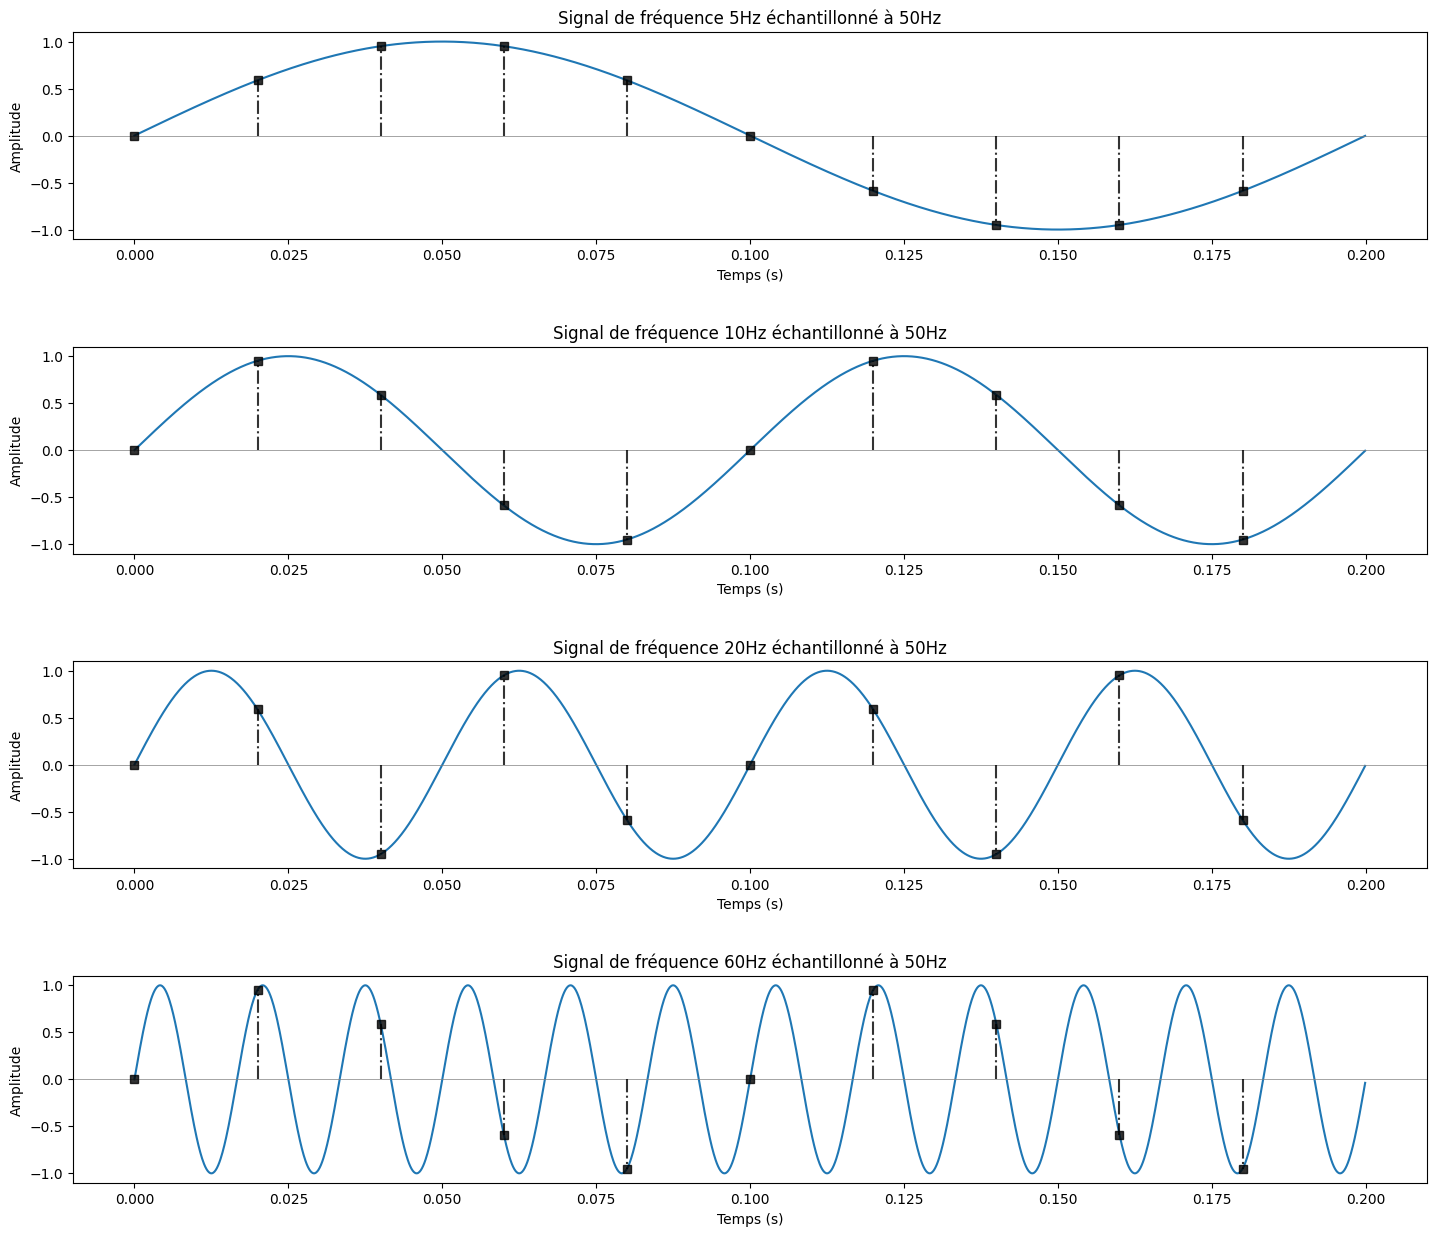

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

duree = 0.2

FE = 10000
t = np.arange(0,duree,1/FE)

signal1_freq = 5
signal1 = np.sin(2*np.pi*signal1_freq*t)

signal2_freq = 10
signal2 = np.sin(2*np.pi*signal2_freq*t)

signal3_freq = 20
signal3 = np.sin(2*np.pi*signal3_freq*t)

signal4_freq = 60
signal4 = np.sin(2*np.pi*signal4_freq*t)

# Creation de la version échantillonnée de ces signaux continus
fe = 50 # doit être un nombre entier
td = np.arange(0,duree,1/fe)

signal1_ech = np.sin(2*np.pi*signal1_freq*td)
signal2_ech = np.sin(2*np.pi*signal2_freq*td)
signal3_ech = np.sin(2*np.pi*signal3_freq*td)
signal4_ech = np.sin(2*np.pi*signal4_freq*td)

print(f"Fréquence d'échantillonnage : {fe} Hz")

# Visualisation des signaux échantillonnés
fig, axes = plt.subplots(4, 1, figsize=(15,13))
axes[0].plot(t, signal1)
axes[0].axhline(0, color="gray", linestyle="-", linewidth=0.5)
axes[0].plot(td, signal1_ech, linestyle='None', alpha=0.8, marker='s', color='black')
axes[0].vlines(td, ymin=0, ymax=signal1_ech, linestyle='-.', alpha=0.8, color='black')
axes[0].set_ylabel("Amplitude")
axes[0].set_xlabel("Temps (s)")
axes[0].set_title(f"Signal de fréquence {signal1_freq}Hz échantillonné à {fe}Hz")

axes[1].plot(t, signal2)
axes[1].axhline(0, color="gray", linestyle="-", linewidth=0.5)
axes[1].plot(td, signal2_ech, linestyle='None', alpha=0.8, marker='s', color='black')
axes[1].vlines(td, ymin=0, ymax=signal2_ech, linestyle='-.', alpha=0.8, color='black')
axes[1].set_ylabel("Amplitude")
axes[1].set_xlabel("Temps (s)")
axes[1].set_title(f"Signal de fréquence {signal2_freq}Hz échantillonné à {fe}Hz")

axes[2].plot(t, signal3)
axes[2].axhline(0, color="gray", linestyle="-", linewidth=0.5)
axes[2].plot(td, signal3_ech, linestyle='None', alpha=0.8, marker='s', color='black')
axes[2].vlines(td, ymin=0, ymax=signal3_ech, linestyle='-.', alpha=0.8, color='black')
axes[2].set_ylabel("Amplitude")
axes[2].set_xlabel("Temps (s)")
axes[2].set_title(f"Signal de fréquence {signal3_freq}Hz échantillonné à {fe}Hz")

axes[3].plot(t, signal4)
axes[3].axhline(0, color="gray", linestyle="-", linewidth=0.5)
axes[3].plot(td, signal4_ech, linestyle='None', alpha=0.8, marker='s', color='black')
axes[3].vlines(td, ymin=0, ymax=signal4_ech, linestyle='-.', alpha=0.8, color='black')
axes[3].set_ylabel("Amplitude")
axes[3].set_xlabel("Temps (s)")
axes[3].set_title(f"Signal de fréquence {signal4_freq}Hz échantillonné à {fe}Hz")

fig.tight_layout(pad = 3.0)
plt.show()

- Regardons de plus près le signal2 = 10 Hz et le signal 4 = 60Hz.

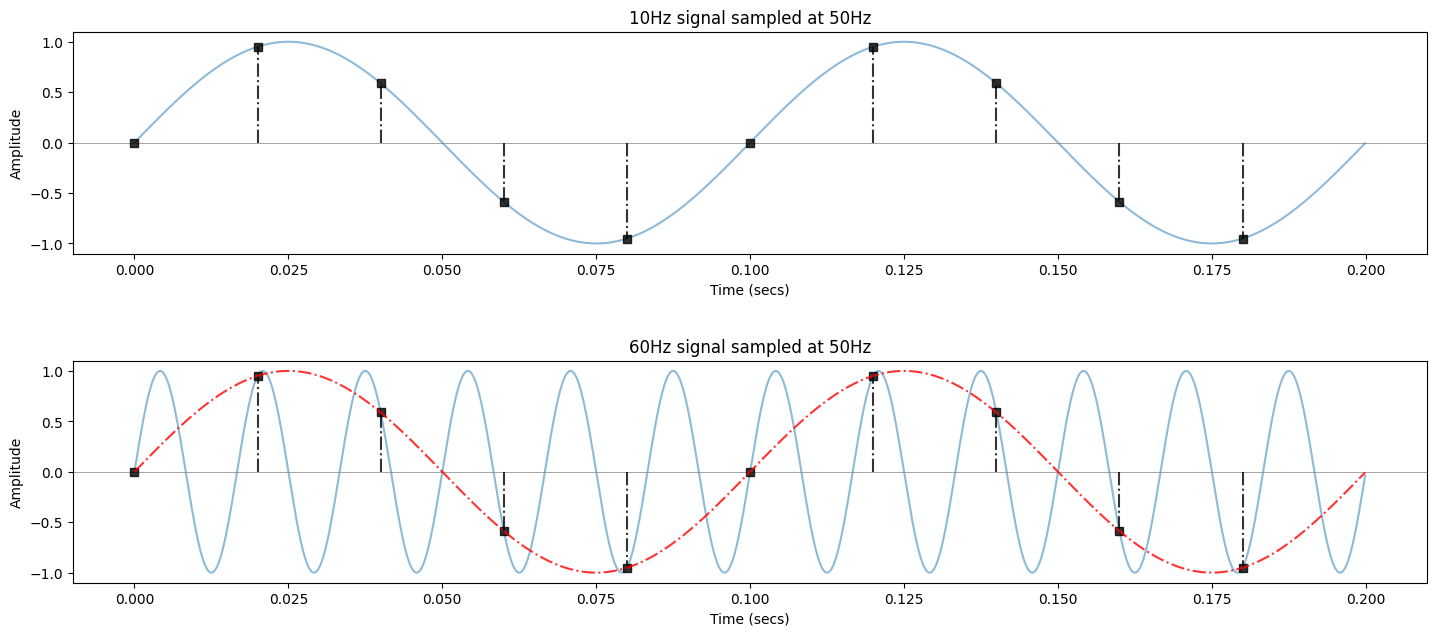

In [11]:
fig, axes = plt.subplots(2, 1, figsize=(15,7))

axes[0].plot(t, signal2, alpha=0.5)
axes[0].axhline(0, color="gray", linestyle="-", linewidth=0.5)
axes[0].plot(td, signal2_ech, linestyle='None', alpha=0.8, marker='s', color='black')
axes[0].vlines(td, ymin=0, ymax=signal2_ech, linestyle='-.', alpha=0.8, color='black')
axes[0].set_ylabel("Amplitude")
axes[0].set_xlabel("Time (secs)")
axes[0].set_title(f"{signal2_freq}Hz signal sampled at {fe}Hz")

axes[1].plot(t, signal4, alpha=0.5)
axes[1].axhline(0, color="gray", linestyle="-", linewidth=0.5)
axes[1].plot(td, signal4_ech, linestyle='None', alpha=0.8, marker='s', color='black')
axes[1].vlines(td, ymin=0, ymax=signal4_ech, linestyle='-.', alpha=0.8, color='black')
axes[1].plot(t, signal2, linestyle='-.', alpha=0.8, color='red')
axes[1].set_ylabel("Amplitude")
axes[1].set_xlabel("Time (secs)")
axes[1].set_title(f"{signal4_freq}Hz signal sampled at {fe}Hz")

fig.tight_layout(pad = 3.0)
plt.show()

Le signal 60Hz est replié (aliasé) à 10Hz. Et une fois que le signal est numérisé, il n'y aurait aucun moyen de faire la différence entre un signal réel à 10 Hz et un signal aliasé!

Au premier échantillon, les deux sinusoïdes ne font que commencer; pour l'échantillon suivant, la sinusoïde 60Hz a presque terminé une période complète!

La formule pour obtenir la fréquence aliasée est $|n*f_e-f|$ où $f_e$ est notre fréquence d'échantillonnage, $f$ est la fréquence du signal et $n$ est le multiple entier le plus proche de la fréquence d'échantillonnage, c-à-d $round(\dfrac{f}{f_e})$. 

In [13]:
# C'est plus simple à expliquer par un code
fe = 50
signal_freq = 60 # à tester avec différentes fréquences
entier_multiple_proche = round(signal_freq/fe)
freq_alias = abs(entier_multiple_proche*fe-signal_freq)

print(f"Fréquence réelle du signal : {signal_freq} Hz")
print(f"Fréquence d'échantillonnage : {fe} Hz")
print(f"Entier multiple le plus proche : {entier_multiple_proche}")
print(f"Fréquence aliasée : {freq_alias} Hz")

Fréquence réelle du signal : 60 Hz
Fréquence d'échantillonnage : 50 Hz
Entier multiple le plus proche : 1
Fréquence aliasée : 10 Hz


---
### Exercice :

Tracer le signal réel et échantillonné pour les signaux sinusoïdaux ayant les fréquences suivantes : (la fréquence d'échantillonnage est $fe=50$ Hz)

- f1=40 Hz, f2=90 Hz, f3=140 Hz

In [1]:
# Vous pouvez utiliser le programme "Code_KB" 
# ou le coder en s'inspirant des 2 exemples précédents


---
### Exercice :

Tracer le signal réel et échantillonné pour les signaux sinusoïdaux ayant les fréquences suivantes : (la fréquence d'échantillonnage est $fe=50$ Hz)

- f1=50 Hz, f2=100 Hz, f3=150 Hz

In [2]:
# Vous pouvez utiliser le programme "Code_KB" 
# ou le coder en s'inspirant des 2 exemples précédents


---

<a id="IFE"></a>

## Influence de la fréquence d'échantillonnage sur les signaux audio :

Dans cette partie, on utilisera des données audio comme signal principal. On a choisit le son car on peut à la fois visualiser et entendre le signal. On va tracer ces formes d'onde, les manipuler, puis les écouter. Il est nécessaire de brancher vos écouteurs afin que vous puissiez vraiment entendre les distinctions entre les différents échantillons audio.

16-bit audio
Fréquence d'échantillonnage : 44100 Hz
Nombre de canaux (voix) = 1
Nombre total d'échantillons : 169600


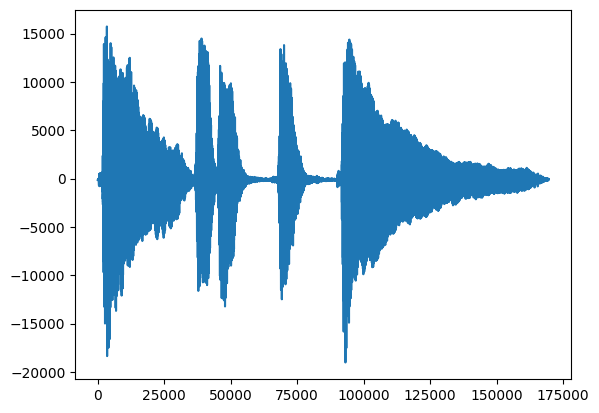

In [15]:
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np 
from IPython.display import (Audio, display, clear_output)
from scipy.io.wavfile import read
%matplotlib inline

fe, son_44100 = read('piano.wav')

n_bits = 16
print(f"{n_bits}-bit audio")
print(f"Fréquence d'échantillonnage : {fe} Hz")
print(f"Nombre de canaux (voix) = {len(son_44100.shape)}")
print(f"Nombre total d'échantillons : {son_44100.shape[0]}")

if len(son_44100.shape) == 2:
    print("Convertion audio stereo vers mono")
    son_44100 = son_44100.sum(axis=1) / 2

plt.figure()
plt.plot(son_44100)
plt.show()

ipd.Audio(son_44100, rate=fe)

Fréquence d'échatillonnage : 22050 Hz avec limite Nyquist 11025 Hz


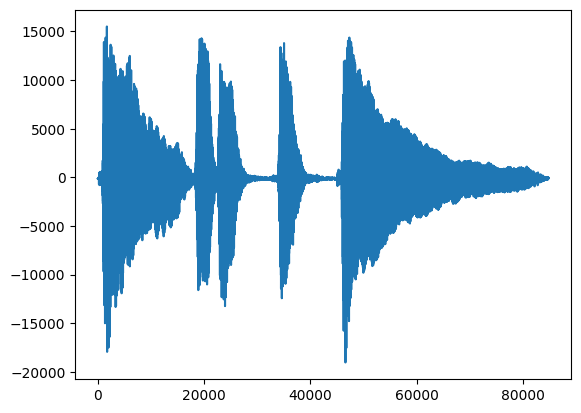

In [19]:
facteur = 2
fe2 = int(fe / facteur)
son_11025 = son_44100[::facteur]

print(f"Fréquence d'échatillonnage : {fe2} Hz avec limite Nyquist {int(fe2 / 2)} Hz")

plt.figure()
plt.plot(son_11025)
plt.show()

ipd.Audio(son_11025, rate=fe2)

---
### Exercice :

Tracer le signal audio et écouter ce signal pour $fe=11025$ Hz, $fe=4410$ Hz, puis $fe=2205$ Hz. Conclure sur la qualité du son et le graphe représentatnt l'échantillon audio.

In [ ]:
# fe = 11025 Hz


In [ ]:
# fe = 4410 Hz


In [3]:
# fe = 2205 Hz


---
<a id="QUA"></a>

## Quantification

La quantification fait référence au processus de transformation d'un signal analogique, qui a un ensemble continu de valeurs, en un signal numérique, qui a un ensemble discret. Voir la figure ci-dessous.

<a id="CEQ"></a>

### Caractérisation de l'erreur de quantification

Un échantillon numérisé peut avoir une erreur maximale de la moitié de la taille du pas de discrétisation (c'est-à-dire ± la moitié du «bit le moins significatif» (LSB)). Pourquoi ? Parce que lorsque nous convertissons une valeur analogique en une valeur numérique, nous arrondissons à l'entier le plus proche. Considérons un signal de tension de 0,2271 V sur la broche d'entrée analogique d'un Arduino Uno, c'est presque à mi-chemin entre les valeurs 0,2246 V et 0,2295 V, ce qui entraînerait une erreur de $\frac{4.89𝑚𝑉}{2}$
(et soit converti en 47 ou 48 via analogRead d'Arduino).

---
### Quantification : Principe de conversion Analogique — Numérique (CAN) :


[<img src="Quant.png" width="700"/>](Quantification_CAN)

- CAN unipolaire :
$$N=2^n\dfrac{e}{PE} \; \text{ ou }\; N=2^n\dfrac{e}{PE}+0.5$$ 

- CAN bipolaire :
$$N=2^{n-1}\left(\dfrac{e}{PE}+1\right)$$ 

$PE$ : Pleine Echelle (Fulle Scale)    
$q=\dfrac{PE}{2^n}$ : Pas de quantification (Quantum)

---
### Quantification : Principe de conversion Numérique — Analogique (CNA) :


[<img src="Quant1.png" width="600"/>](Quantification_CNA)

- CAN unipolaire :
$$V_s=PE\dfrac{N}{2^n}$$ 

- CAN bipolaire :
$$N=PE\left(\dfrac{N}{2^{n-1}}-1\right)$$ 

$PE$ : Pleine Echelle (Fulle Scale)    
$q=\dfrac{PE}{2^n}$ : Pas de quantification (Quantum)

---

### Exemple :
- Convertir le signal analogique $s(t)=\sin(2\pi*10* t)$ en signal numérique. Le CAN est un convertisseur $4$ bits.
- Réaliser la conversion inverse (Numérique—Analogique) et comparer avec le signal original.

4-bit dans l'intervelle 0 à 15
Valeur Max : 16, Valeur Moy : 7.51


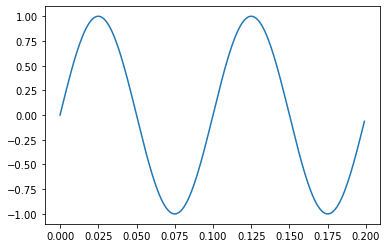

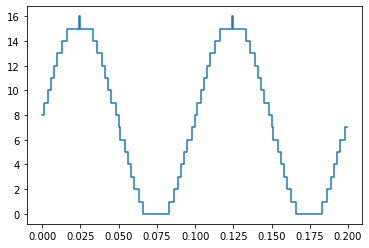

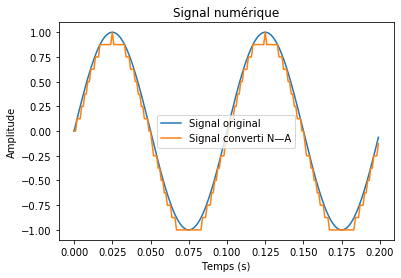

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 

f_e = 1000
t = np.arange(0,0.2,1/f_e)
data = np.sin(2*np.pi*10*t)

PE = 1
n_bits = 4
data_4bit = (2**(n_bits-1))*((data/PE)+1)
data_4bit = data_4bit.astype(int)

print(f"{n_bits}-bit dans l'intervelle {0} à {2**(n_bits ) - 1}")
print(f"Valeur Max : {np.max(data_4bit)}, Valeur Moy : {np.mean(data_4bit):.2f}")

plt.figure()
plt.plot(t,data)
plt.show()

plt.figure()
plt.step(t,data_4bit)
plt.show()


e_s = PE*(data_4bit/(2**(n_bits-1))-1)
plt.figure()
plt.plot(t,data, label='Signal original')
plt.plot(t,e_s, label='Signal converti N—A')
plt.title('Signal numérique')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

---
- Si on veut afficher sur l'axe des ordonnées le code binaire équivalent, on peut utiliser ce code.

4-bit dans l'intervelle 0 à 15
Valeur Max : 16, Valeur Moy : 7.51


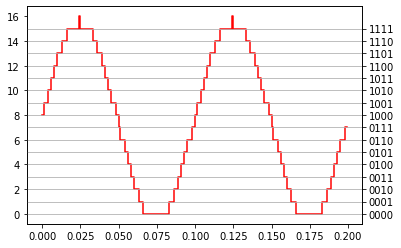

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 

f_e = 1000
t = np.arange(0,0.2,1/f_e)
data = np.sin(2*np.pi*10*t)

PE = 1
n_bits = 4
data_4bit = (2**(n_bits-1))*((data/PE)+1)
data_4bit = data_4bit.astype(int)

print(f"{n_bits}-bit dans l'intervelle {0} à {2**(n_bits ) - 1}")
print(f"Valeur Max : {np.max(data_4bit)}, Valeur Moy : {np.mean(data_4bit):.2f}")

def Dec_Bin(d):
    b = 0
    p = 0
    temp = d
    while(temp>0):
        b = ((temp%2)*(10**p)) + b
        temp = int(temp/2)
        p = p + 1
    return b

a = np.arange(0,16)
r = []
for i in range(len(a)):
    r.append(Dec_Bin(a[i]))

fig, ax1 = plt.subplots()
ax1.step(t,data_4bit, color='r')

ax2 = ax1.twinx()  
ax2.plot(t,data_4bit, color='None')  
ax2.tick_params(axis='y', labelcolor='k')
x=[]
for i in range(16):
    x.append('{:04d}'.format(r[i]))
ax2.set_yticks(np.arange(0,16))
ax2.set_yticklabels(x)
ax2.grid()

plt.show()

---

### Exercice :
- Convertir les signaux analogiques $s_1(t)=6+6\sin(2\pi t)$ et $s_2(t)=6\sin(2\pi t)$ en signaux numériques. Le CAN est un convertisseur $4$ bits.
- Réaliser la conversion inverse (Numérique—Analogique) et comparer avec les signaux originaux.

In [ ]:
# s1(t)


In [ ]:
# s2(t)


---
<a id="IQS"></a>

## Influence de la quantification sur les signaux audio :

Pour les exemples ci-dessous, nous travaillerons avec des formes d'onde audio pré-numérisées échantillonnées à 44,1 kHz et quantifiées à 16 bits. Donc, bien que ce ne soit pas un véritable échantillon continu, on le traitera comme tel. Et on va "sous-échantillonner" pour étudier les effets des niveaux de quantification et des taux d'échantillonnage.

Fréquence d'échantillonnage : 44100 Hz
Nombre de canaux (voix) = 1
Nombre total d'échantillons : 169600
Durée = 3.8458049886621315s
[-140 -140 -140 ... -126 -123 -126]
16-bits intervalle de -32768 à 32767
Valeur Max : 15732, Valeur Moy : -118.21


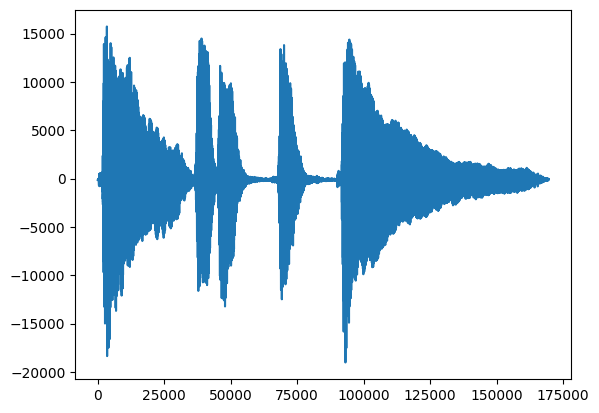

In [24]:
import IPython.display as ipd
import matplotlib.pyplot as plt 
import numpy as np 
from scipy import signal
import random
from IPython.display import (Audio, display, clear_output)
from scipy.io.wavfile import read
%matplotlib inline

fe, data_16bit = read('piano.wav')

print(f"Fréquence d'échantillonnage : {fe} Hz")
print(f"Nombre de canaux (voix) = {len(data_16bit.shape)}")
print(f"Nombre total d'échantillons : {data_16bit.shape[0]}")    

duree_secs = data_16bit.shape[0] / fe
print(f"Durée = {duree_secs}s")
print(data_16bit)
n_bits = 16
print(f"{n_bits}-bits intervalle de -{2**(n_bits - 1)} à {2**(n_bits - 1) - 1}")
print(f"Valeur Max : {np.max(data_16bit)}, Valeur Moy : {np.mean(data_16bit):.2f}")

plt.figure()
plt.plot(data_16bit)
plt.show()

ipd.Audio(data_16bit, rate=fe)

[-8 -8 -8 ... -7 -7 -7]
12-bits : intervalle audio ranges from -2048 à 2047
Valeur Max : 983, Valeur Moy : -7.32


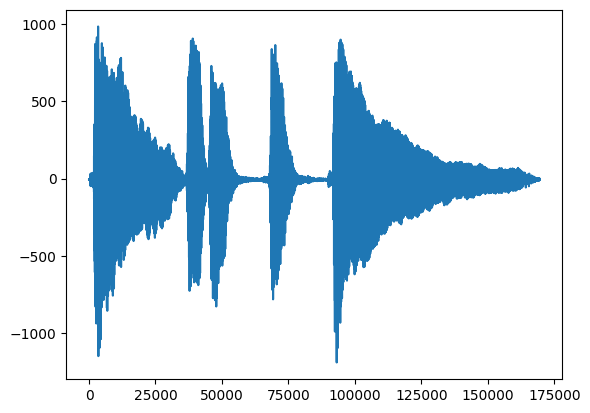

In [32]:
data_float = data_16bit / 2**16

n_bits = 12
data_6bit = data_float * 2**n_bits
data_6bit = data_6bit.astype(int)
print(data_6bit)
print(f"{n_bits}-bits : intervalle audio ranges from -{2**(n_bits - 1)} à {2**(n_bits - 1) - 1}")
print(f"Valeur Max : {np.max(data_6bit)}, Valeur Moy : {np.mean(data_6bit):.2f}")

plt.plot(data_6bit)
plt.show()
ipd.Audio(data_6bit, rate=fe)

---
### Exercice :

Tracer le signal audio et écouter ce signal pour un convertisseur $4$ bits puis $3$ bits. Conclure sur la qualité du son et le graphe représentatnt l'échantillon audio.

In [6]:
# CAN 12 bits





In [6]:
# CAN 10 bits





In [6]:
# CAN 8 bits





In [6]:
# CAN 4 bits





In [7]:
# CAN 3 bits





In [18]:
def X_set_uniform(L,xmax):
    q = 2*xmax/(2**L) # pas de quantification
    l = np.arange(0,2**L)
    X_set = l*q-xmax
    return X_set

xmax = 1 #valeur extreme de l'intervalle I
L = 3 # nombre de bit du numériseur.
X_set = X_set_uniform(L,xmax)

print("--- Ensemble X (L={}) ---".format(L))
for indice in range(len(X_set)):
    print("x_{}={}".format(indice,X_set[indice]))

--- Ensemble X (L=3) ---
x_0=-1.0
x_1=-0.75
x_2=-0.5
x_3=-0.25
x_4=0.0
x_5=0.25
x_6=0.5
x_7=0.75


In [19]:
def X_set_uniform(L,xmax):
    q = 2*xmax/(2**L-1) # pas de quantification
    l = np.arange(0,2**L)
    X_set = l*q-xmax
    return X_set

xmax = 1 #valeur extreme de l'intervalle I
L = 3 # nombre de bit du numériseur.
X_set = X_set_uniform(L,xmax)

print("--- Ensemble X (L={}) ---".format(L))
for indice in range(len(X_set)):
    print("x_{}={}".format(indice,X_set[indice]))

--- Ensemble X (L=3) ---
x_0=-1.0
x_1=-0.7142857142857143
x_2=-0.4285714285714286
x_3=-0.1428571428571429
x_4=0.1428571428571428
x_5=0.4285714285714284
x_6=0.7142857142857142
x_7=1.0


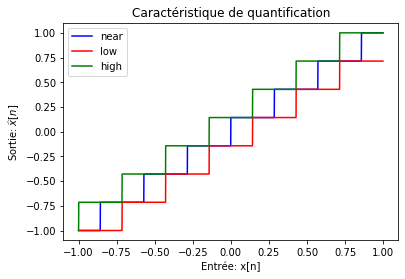

In [20]:
import numpy as np

def X_set_uniform(L,xmax):
    q = 2*xmax/(2**L-1) # pas de quantification
    l = np.arange(0,2**L)
    X_set = l*q-xmax
    return X_set

def Q(x,X_set,type="near"):
    x_est = []
    for x_temp in x:

        if type== "near":
            distance = np.abs(x_temp-X_set)
            
        if type == "low":
            distance = np.abs(x_temp-X_set)+10000*(x_temp<X_set) # add constraint
            
        if type == "high":
            distance = np.abs(x_temp-X_set)+10000*(x_temp>X_set) # add constraint
        
        index = distance.argmin()
        x_est_temp = X_set[index]
        x_est.append(x_est_temp)
    return x_est

##############################

x = np.arange(-xmax,xmax,0.001)
color_list = ["b-","r-","g-"]

for indice,type in enumerate(["near","low","high"]):
    x_est = Q(x,X_set,type=type)
    plt.plot(x,x_est,color_list[indice],label=type)

plt.xlabel("Entrée: x[n]")
plt.ylabel("Sortie: $\widehat{x}[n]$")
plt.legend()
plt.title("Caractéristique de quantification");

In [21]:
from ipywidgets import interact

def show_quantification_noise(L=3):
    xmax=1
    x = np.arange(-xmax,xmax,0.001)
    X_set = X_set_uniform(L,xmax)
    x_est = Q(x,X_set,type="near")
    e = x-x_est
    
    plt.figure()
    plt.plot(x,x_est,'b',label="original")
    plt.plot(x,x,'b--',label="quantifié")
    plt.plot(x,e,'r--',label="erreur")
    plt.hlines(-xmax/(2**L-1),-xmax,xmax,linestyles='dashed')
    plt.hlines(xmax/(2**L-1),-xmax,xmax,linestyles='dashed')
    plt.xlabel("Entrée: $x[n]$")
    plt.ylabel("Sortie: $\widehat{x}[n]$")
    plt.legend()
    
    plt.figure()
    t = np.arange(0,1,0.001)
    x = np.sin(2*np.pi*t)
    x_est = Q(x,X_set,type="near")
    e = x-x_est
    plt.plot(t,x,'b--',label="original")
    plt.plot(t,x_est,'b',label="quantifié")
    plt.plot(t,x-x_est,'r--',label="erreur")
    plt.xlabel("Temps (s)")
    plt.ylabel("Amplitude")
    plt.legend()

##################################

interact(show_quantification_noise,L=(2,6,1));

interactive(children=(IntSlider(value=3, description='L', max=6, min=2), Output()), _dom_classes=('widget-inte…

---
## Images 
<p><span class="badge badge-danger" style="background-color:#bbbbbb">Quantification :</span> <span class="badge badge-info">Images</span></p>

* Modifier le nombre de bits de quantification et visualiser l'image :
    - 4 bits : $2^4=16$
    - 5 bits : $2^5=32$
    - 6 bits : $2^6=64$
    - 7 bits : $2^7=128$
    - 8 bits : $2^8=256$
    - 9 bits : $2^9=512$

In [36]:
# Quantification image
# Importation du module Image à partir de la bibliothèque PIL  
from PIL import Image  
import PIL  
  
# Création de l'object image  
im1 = Image.open(r"lenna.png")  
  
# Quantification de l'image  
im1 = im1.quantize(16)  
  
# Affichage de l'image quantifiée  
im1.show() 

---
<div class='alert alert-info'>Les documentations sont disponibles aux adresses suivantes :
    <ul>
        <li><a href="https://numpy.org/doc/1.19/">Numpy</a></li>
        <li><a href="https://docs.scipy.org/doc/scipy/reference/">Scipy</a></li>
        <li><a href="https://matplotlib.org">Matplotlib</a></li>
    </ul>
</div>

In [6]:
import numpy as np
from scipy.signal import *
import matplotlib.pyplot as plt
from IPython.display import Audio

In [7]:
Te = 0.01
t = np.arange(0,0.5,Te)
print(t)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49]


### Numérisation du signal 

Pour synthetiser le signal numérique, nous allons évaluer $h(t)$ pour chaque valeur de $t$ comprise dans le vecteur temps `t` précédemment généré. 

**Question** En utilisant la fonction `np.exp` de Numpy (voir <a href="https://numpy.org/doc/stable/reference/generated/numpy.exp.html">documentation</a>), évaluer pour $t=nT_e$ la fonction $h(t)=\frac{K}{\tau}e^{-\frac{t}{\tau}}$ avec les paramètres $K=1$ et $\tau=0.2$s.

In [8]:
K = 1
tau = 0.2
h = (K/tau)*np.exp(-t/tau)*(t>=0)
print(h)

[5.         4.75614712 4.52418709 4.30353988 4.09365377 3.89400392
 3.7040911  3.52344045 3.35160023 3.18814076 3.0326533  2.88474905
 2.74405818 2.61022888 2.48292652 2.36183276 2.24664482 2.13707466
 2.0328483  1.93370512 1.83939721 1.74968875 1.66435542 1.58318385
 1.50597106 1.43252398 1.36265897 1.2962013  1.23298482 1.17285144
 1.1156508  1.06123987 1.00948259 0.96024954 0.91341762 0.86886972
 0.82649444 0.78618583 0.7478431  0.71137036 0.67667642 0.64367452
 0.61228214 0.58242079 0.55401579 0.52699612 0.50129422 0.47684581
 0.45358977 0.43146793]


### Affichage du signal 

Sous Python, l'affichage d'un signal numérique peut s'obtenir facilement via la librairie matplotlib. Specifiquement, nous pouvons utiliser :

* soit la fonction `plot` avec un marqueur circulaire  (voir <a href="https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.plot.html">documentation</a>),
* soit la fonction `stem` (voir <a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.stem.html">documentation</a>).

**Question** Afficher le signal $h$ pour $t=nT_e$ en utilisant la fonction `plot`avec marqueur circulaire (`o`) ou avec la fonction `stem`. Faire la représentation en fonction de $n$, puis en fonction de $nT_e$ (en s). Veiller à bien annoter l'axe des abscisses et des ordonnées avec les fonctions `xlabel` et `ylabel`

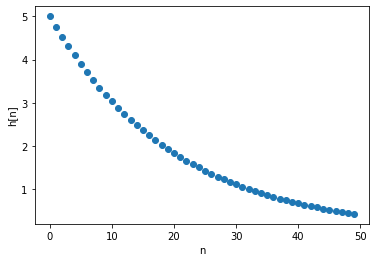

In [9]:
plt.figure()
plt.plot(h,'o')
plt.xlabel("n")
plt.ylabel("h[n]")
plt.show()

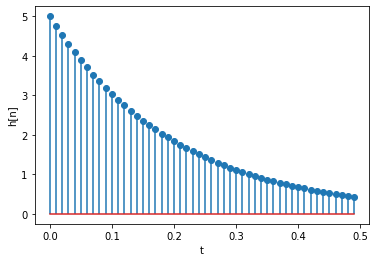

In [10]:
plt.figure()
plt.stem(t,h,'o',use_line_collection=True)
plt.xlabel("t")
plt.ylabel("h[n]")
plt;show()

**Question** Représenter le signal `x` en fonction du temps pour $t$ allant de $0$ à $0.002$s (en annotant les abscisses et les ordonnées).

**Question** En utilisant la fonction `Audio` d'Ipython (voir <a href="https://ipython.org/ipython-doc/3/api/generated/IPython.display.html">documentation</a>), écouter le signal `x`.

In [22]:
def compute_output(h,x):
    y = np.zeros(len(h)+len(x)-1) # initialise output
    
    for n in range(len(y)):
        for l in range(len(h)):
            if ((n-l)>=0) and (n-l)<len(x):
                y[n] += h[l]*x[n-l]
                
    return y

Compute_output vs convolve: mean error=0.0


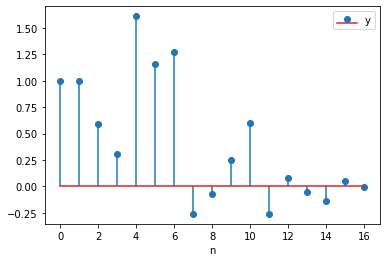

In [23]:
x = [1,0.1,-0.3,0.5,1.4,-0.5,0.1]
h = [1,0.9,0.8,0,0,0,0.5,0,0,0,-0.1]

y = compute_output(h,x)

plt.stem(y,use_line_collection=True,label='y')
plt.xlabel('n')
plt.legend()

print("Compute_output vs convolve: mean error={}".format(np.mean(y-np.convolve(h,x))))

In [7]:
from numpy import *
from scipy.stats import norm
from matplotlib.pyplot import *
from ipywidgets import interact
from numpy.fft import *

Pour générer une séquence de 51 points contenant 30 impulsions, taper : 

```
p=[ones(1,30) zeros(1,21)]
```

**Question :**  Convoluer `p` avec l’exponentielle `h1` à l’aide de la fonction `convolve`  et tracer le résultat `y_1[n]`.


<div class="alert alert-info">
La documentation de la fonction convolve est disponible à l'adresse: <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html">https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html</a>
</div>

**Question :** Convoluer `p` avec lui même, puis `h1` avec lui même aussi. Tracer les résultats. Les résultats ont-ils les mêmes formes et amplitudes que celles attendues ?

#### Filtre 1 : $H_1(z)=0.5(1−z^{-1})$

#### Filtre 2 : $H_2(z)=0.5(1+z^{-1})$

#### Filtre 3 : $H_3(z)=0.5(1-z^{-2})$

#### Filtre 4 : $H_4(z)=\dfrac{z^{-1}}{1-z^{-2}}$

#### Filtre 5 : $H_5(z)=\dfrac{z^{-1}-0.5z^{-5}}{1-z^{-2}}$